In [415]:
# Create your first MLP in Keras
from keras import models
from keras import layers
import pandas as pd
import numpy as np
from sklearn import preprocessing
from keras import metrics


In [392]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load pima indians dataset
dataset = pd.read_csv("covid_ventilator_kerala.csv")
# split into input (X) and output (Y) variables
dataset=pd.DataFrame(dataset)
dataset.head()





,Date,Cumulative Positive cases,Active cases,Cumulative cases Recovered,Total persons in Quarantine/Isolation,Persons in Home/ Institution quarantine,Persons in Hospital Isolation,Cumulative death,Patients in ICUs,Patients on Ventilator support
0,2020-11-02,444268,355943,86681,293221,271744,21477,1533,803,224
1,2020-11-01,440130,89675,348835,293622,271499,22123,1512,766,214
2,2020-10-31,433105,91190,340324,291440,269059,22381,1484,795,231
3,2020-10-30,425122,90565,332994,288635,266953,21682,1457,806,230
4,2020-10-29,418484,91784,325166,291964,269424,22540,1429,715,217


In [394]:
df=dataset.drop(['Date'],axis=1)

In [395]:
type(df)

pandas.core.frame.DataFrame

In [398]:
x = df.values #returns a numpy array
Normalizer = preprocessing.Normalizer()
x_scaled = Normalizer.fit_transform(x)
df = pd.DataFrame(x_scaled)




In [400]:
df.tail()

,0,1,2,3,4,5,6,7,8
73,0.021822,0.008841,0.017682,0.625236,0.620935,0.466334,0.026929,0.017323,0.064496
74,0.016921,0.007301,0.013249,0.628483,0.625111,0.460483,0.017933,0.016208,0.033190
75,0.011801,0.005039,0.009301,0.634657,0.634078,0.439529,0.010946,0.000000,0.039997
76,0.005200,0.001330,0.005042,0.633215,0.631945,0.445408,0.005180,0.018883,0.029293
77,0.000000,0.000000,0.000000,0.631854,0.629811,0.451772,0.000000,0.000000,0.000000


In [399]:
type(df)

pandas.core.frame.DataFrame

In [401]:
df.columns

RangeIndex(start=0, stop=9, step=1)

In [403]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]

In [404]:
X.head()

,0,1,2,3,4,5,6,7
0,0.370681,0.370681,0.065870,0.370144,0.370681,0.243288,0.370681,0.349067
1,0.371880,0.081538,0.375786,0.375786,0.375429,0.255244,0.370000,0.333606
2,0.362910,0.082680,0.363412,0.370439,0.369502,0.257025,0.359966,0.347254
3,0.359732,0.082987,0.359128,0.371102,0.370903,0.250776,0.356849,0.357523
4,0.363659,0.086783,0.359973,0.386514,0.385352,0.269861,0.359194,0.316288


In [405]:
Y.head()

0    0.357772
1    0.344003
2    0.373380
3    0.376025
4    0.361758
Name: 8, dtype: float64

In [420]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

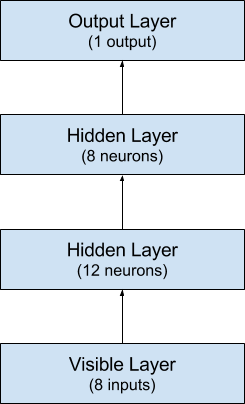

In [422]:
# Compile model
model.compile(loss='mse', optimizer='sgd', metrics=[metrics.RootMeanSquaredError()])

In [423]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=8)

Train on 52 samples, validate on 26 samples
Epoch 1/200
52/52 [==============================] - 0s 6ms/step - loss: 0.0791 - root_mean_squared_error: 0.2813 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0710
Epoch 2/200
52/52 [==============================] - 0s 500us/step - loss: 0.0612 - root_mean_squared_error: 0.2473 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513
Epoch 3/200
52/52 [==============================] - 0s 692us/step - loss: 0.0477 - root_mean_squared_error: 0.2184 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 4/200
52/52 [==============================] - 0s 730us/step - loss: 0.0375 - root_mean_squared_error: 0.1937 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0572
Epoch 5/200
52/52 [==============================] - 0s 653us/step - loss: 0.0300 - root_mean_squared_error: 0.1731 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0714
Epoch 6/200
52/52 [==============================] - 0s 673us/step - loss: 0.0243 - root_mean

Epoch 48/200
52/52 [==============================] - 0s 557us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1972
Epoch 49/200
52/52 [==============================] - 0s 615us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1971
Epoch 50/200
52/52 [==============================] - 0s 615us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1966
Epoch 51/200
52/52 [==============================] - 0s 557us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1958
Epoch 52/200
52/52 [==============================] - 0s 519us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1960
Epoch 53/200
52/52 [==============================] - 0s 538us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0

52/52 [==============================] - 0s 500us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1970
Epoch 96/200
52/52 [==============================] - 0s 538us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1981
Epoch 97/200
52/52 [==============================] - 0s 461us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 98/200
52/52 [==============================] - 0s 500us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1974
Epoch 99/200
52/52 [==============================] - 0s 596us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0388 - val_root_mean_squared_error: 0.1970
Epoch 100/200
52/52 [==============================] - 0s 538us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0389 - val_

Epoch 142/200
52/52 [==============================] - 0s 653us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 143/200
52/52 [==============================] - 0s 673us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 144/200
52/52 [==============================] - 0s 653us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1984
Epoch 145/200
52/52 [==============================] - 0s 577us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1986
Epoch 146/200
52/52 [==============================] - 0s 577us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1988
Epoch 147/200
52/52 [==============================] - 0s 577us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_l

Epoch 189/200
52/52 [==============================] - 0s 634us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1991
Epoch 190/200
52/52 [==============================] - 0s 577us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1990
Epoch 191/200
52/52 [==============================] - 0s 538us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1995
Epoch 192/200
52/52 [==============================] - 0s 577us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1991
Epoch 193/200
52/52 [==============================] - 0s 634us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1993
Epoch 194/200
52/52 [==============================] - 0s 634us/step - loss: 0.0069 - root_mean_squared_error: 0.0830 - val_l

In [425]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

78/78 [==============================] - 0s 77us/step
root_mean_squared_error: 13.29%


In [427]:
model.metrics_names

['loss', 'root_mean_squared_error']

In [428]:
scores

[0.017671738393031634, 0.13293509185314178]